In [2]:
%pip install gekko

Note: you may need to restart the kernel to use updated packages.Collecting gekko
     ---------------------------------------- 13.2/13.2 MB 2.4 MB/s eta 0:00:00




[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np 
from gekko import GEKKO 
import matplotlib.pyplot as plt
from random import random 
%matplotlib inline

In [16]:
m = GEKKO()
m.time = np.linspace(0, 10, 100)

In [17]:
# parameters
mass = 500 
b = m.Param(value=50)
k = m.Param(value=0.8)

In [18]:
# manipulated variable 
p = m.MV(value=0, lb=0, ub=100)
p.STATUS = 1 # allow optimizer to change
p.DCOST = 0.1 # smooth out gas pedal movement
p.DMAX= 20 # slow down the change of gas pedal

In [19]:
# controlled variable
v = m.CV(value=0)
v.STATUS = 1
m.options.CV_TYPE = 2  # squared error
v.SP = 40 
v.TR_INIT = 1 # start from where you are
v.TAU = 5 # time constant of trajectory 

In [20]:
# process model 
m.Equation(mass * v.dt() == -v * b + k * b * p)

m.options.IMODE = 6 
m.solve(disp = False)

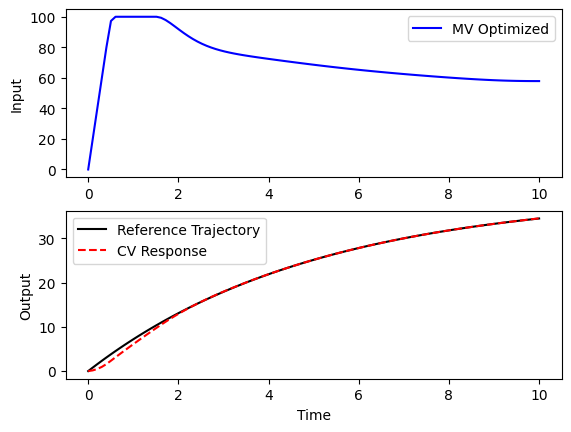

In [21]:
# get additional solution information
import json 
with open (m.path+'//results.json') as f:
    results = json.load(f)

plt.figure()
plt.subplot(2,1,1,)
plt.plot(m.time, p.value, 'b-', label='MV Optimized')
plt.legend()
plt.ylabel('Input')


plt.subplot(2,1,2)
plt.plot(m.time, results['v1.tr'], 'k-', label='Reference Trajectory')
plt.plot(m.time, v.value, 'r--', label='CV Response')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend(loc='best')
